In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dc13208\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stops = set(stopwords.words("english"))

In [4]:
stops = stops.union({"said", "would", "could", "told", "also", "one", "two", "mr", "new", "year"})

In [5]:
df = pd.read_csv("bbc_text_cls.csv")

In [6]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [7]:
len(df)

2225

In [8]:
vectorizer = TfidfVectorizer(stop_words=list(stops))

In [9]:
X = vectorizer.fit_transform(df["text"])

In [12]:
nmf = NMF(
    n_components=10, 
    beta_loss="kullback-leibler", 
    solver="mu", #multiplicative update
    #alpha_W=0.1,
    #alpha_H=0.1,
    #l1_ratio=0.5,
    random_state=0
)

In [13]:
nmf.fit(X)

NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

In [14]:
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words -1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx+1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle("NMF", fontsize=40)

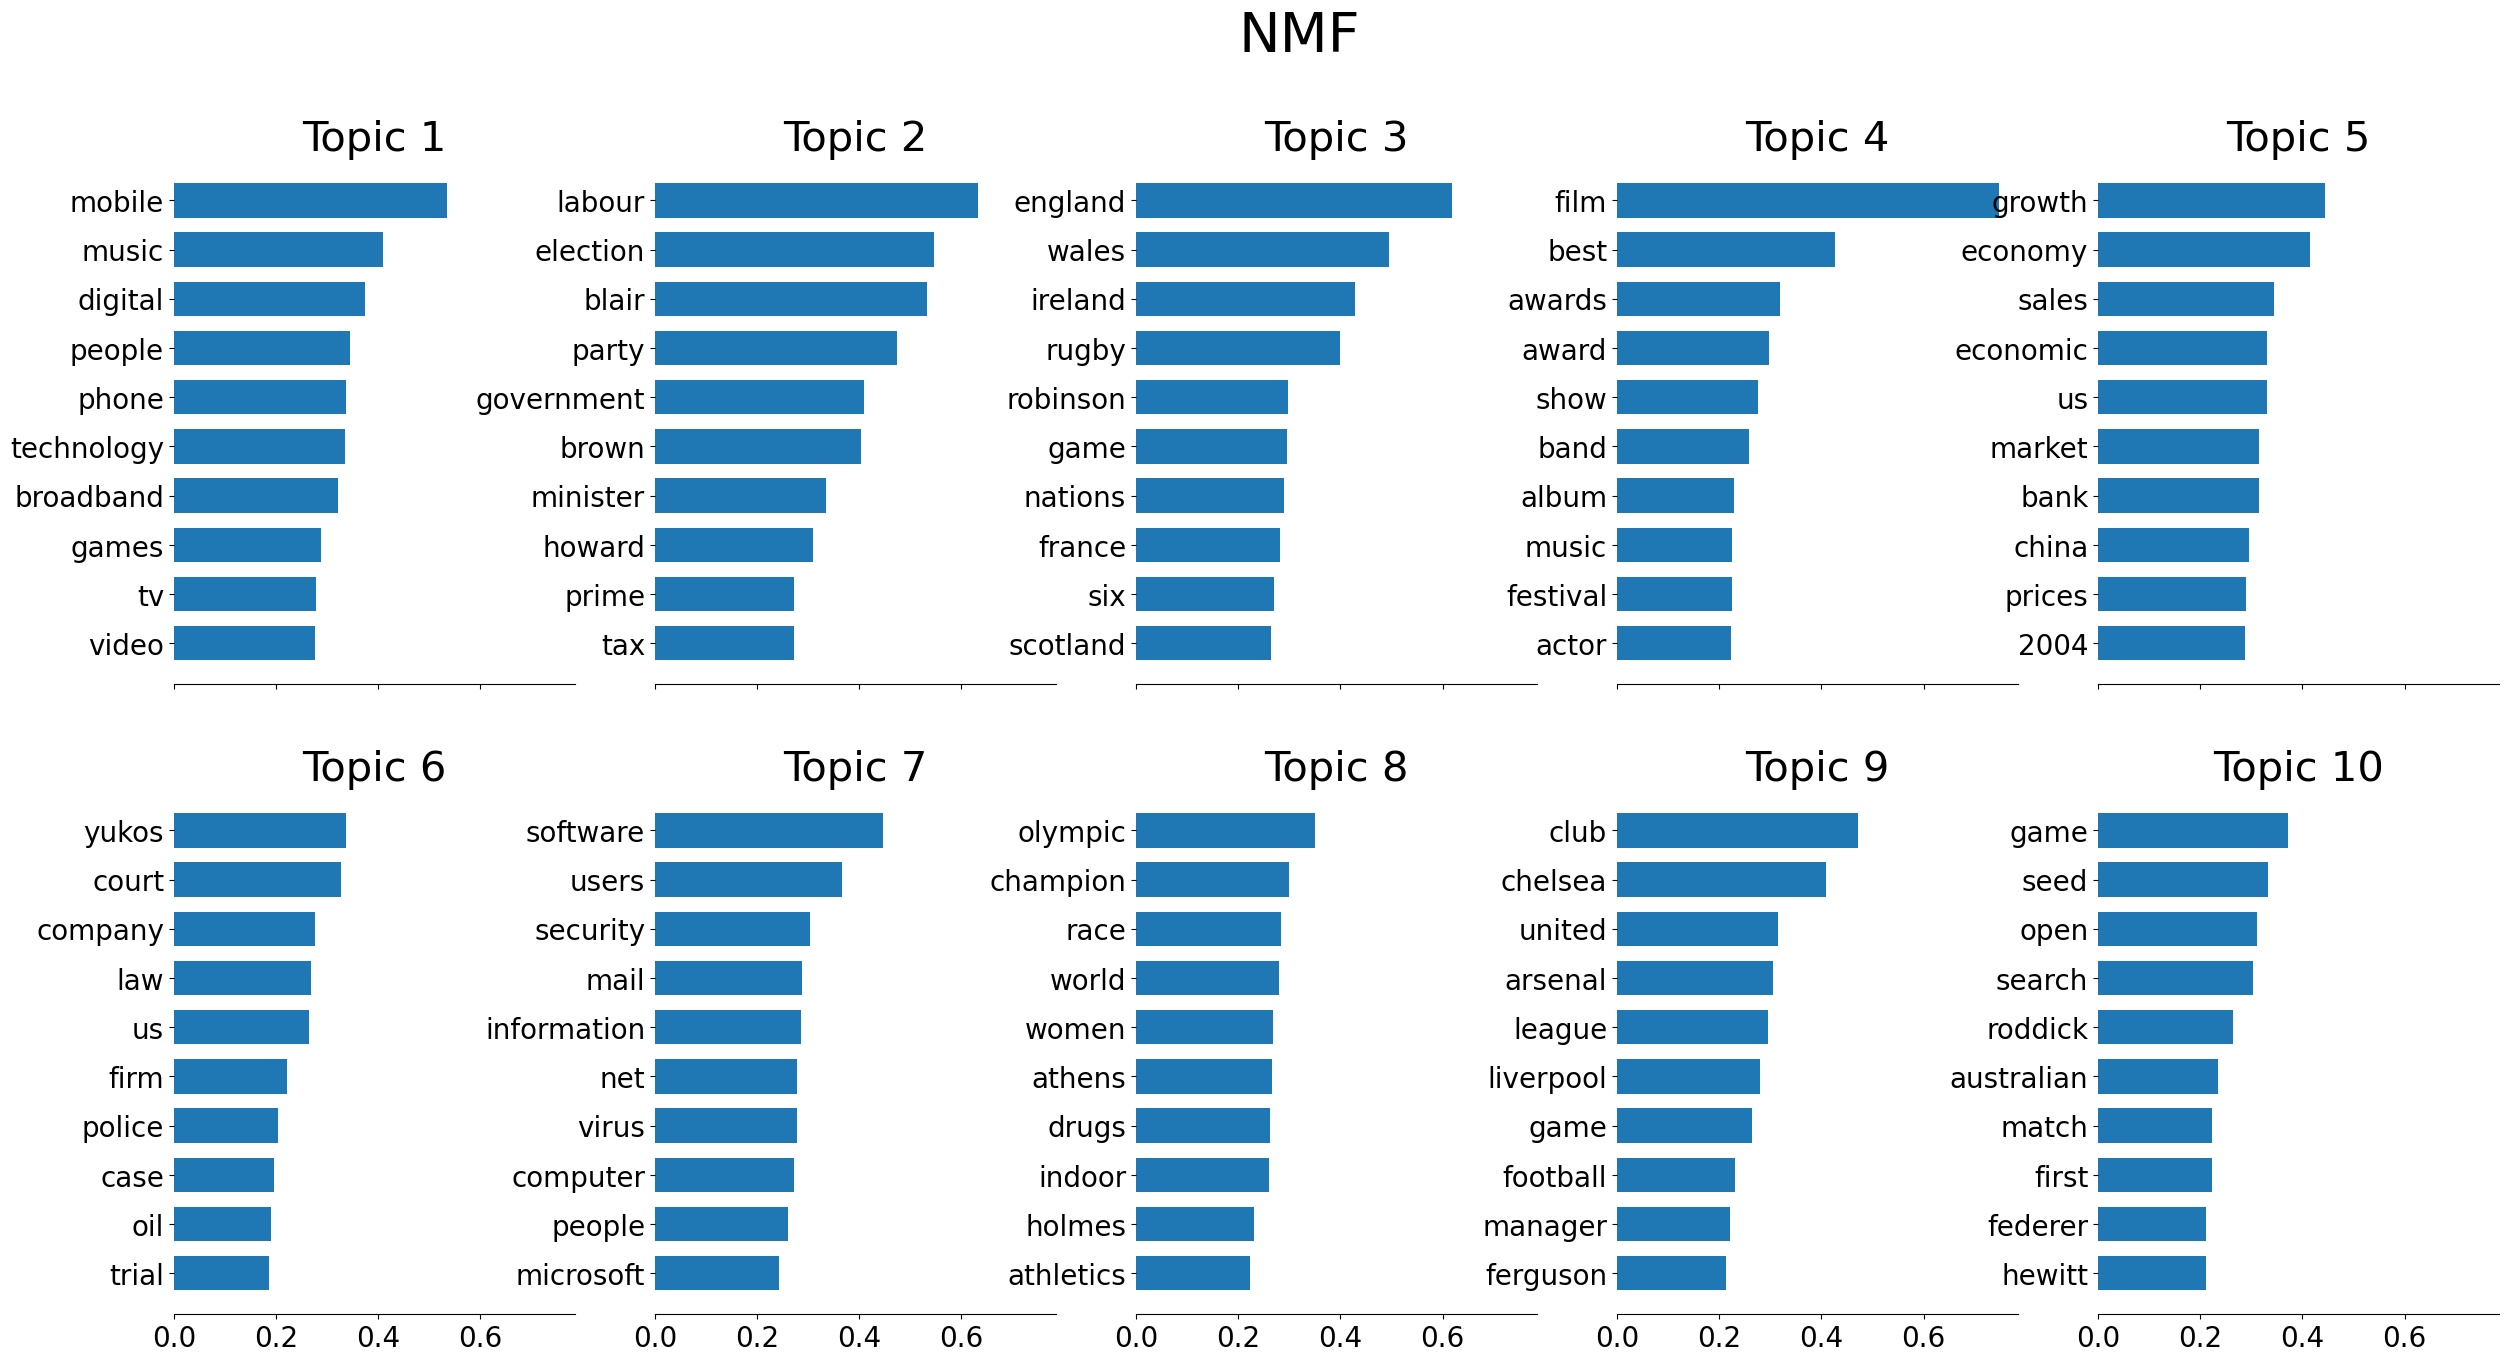

In [15]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf, feature_names);

In [16]:
len(nmf.components_)

10

In [17]:
Z = nmf.transform(X)

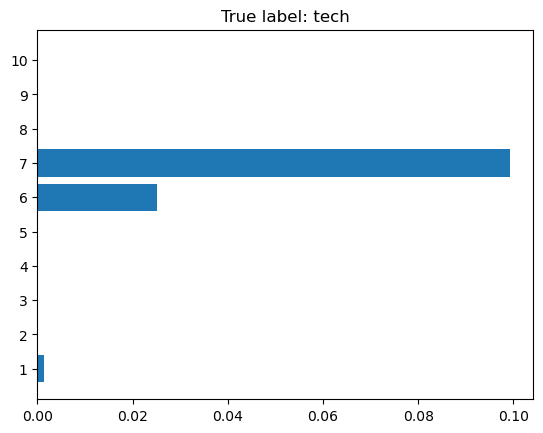

In [22]:
np.random.seed(3)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title("True label: %s" % df.iloc[i]["labels"]);

In [23]:
def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]["text"]))

US peer-to-peer pirates convicted

The first convictions for piracy
over peer-to-peer networks have been handed down in the US.

New
Yorker William Trowbridge and Texan Michael Chicoine have pleaded
guilty to charges that they infringed copyright by illegally sharing
music, movies and software.  The two men faced charges following raids
in August on suspected pirates by the FBI. The pair face jail terms of
up to five years and a $250,000 (£130,000) fine.

In a statement the
US Department of Justice said the two men operated the central hubs in
a piracy community organised across the Direct Connect peer-to-peer
network.  The piracy group called itself the Underground Network and
membership of it demanded that users share between one and 100
gigabytes of files.  Direct Connect allows users to set themselves up
as central servers that act as co-ordinating spots for sharers.  Users
would swap files, such as films and music, by exchanging data over the
network.  During its investigation FBI

Text(0.5, 1.0, 'True label: sport')

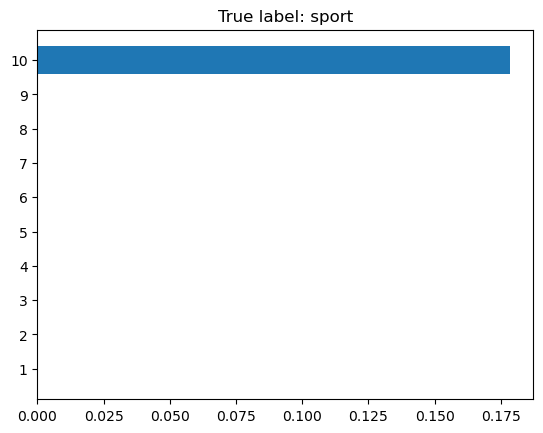

In [28]:
i = np.random.choice(len(df))
z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title("True label: %s" % df.iloc[i]["labels"])

In [29]:
print(wrap(df.iloc[i]["text"]))

Young debut cut short by Ginepri

Fifteen-year-old Donald Young's
first appearance in an ATP tennis tournament proved brief as the
teenager went out in round one of the San Jose Open.

Young shot to
the top of the junior world rankings when he won the boys' singles at
January's Australian Open.  But the wildcard entry was dispatched by
fellow American Robby Ginepri in straight sets, 6-2 6-2, in
California.  Despite that he was happy with his Tour debut.  "It was
fun.  I had my chances, but they didn't come through," he said.
Young, who beat two players ranked in the top 200 when he was just 14,
was only 2-1 down in the first set before losing 10 of the next 13
games.  And Ginepri - six years older than the youngest player to ever
win a junior slam and top the global standings - admitted he was
impressed.

"He's very talented," said Ginepri.  "He's got a long
future ahead of him.  "Being left-handed, he was very quick around the
court.  "His serve is a little deceptive.  He came into th